# Plot synthetic data experiments

This notebook plots the figures related to the synthetic data in the paper "Unbalanced Sobolev Descent". First, you'll have to execute the bash script `experiments.sh` which runs the experiments and saves the results in the folder `./final_outputs`. At that point you'll be able to run this notebook to plot the results.

In [ ]:
%matplotlib inline

import os
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import gridspec

from utils import ddict, shelf, save_animation, plot_weighted_scatter

FONTSIZE = 14
matplotlib.rc('font', **{'family': 'sans-serif', 'sans-serif': 'Arial', 'weight': 'normal', 'size': FONTSIZE})
matplotlib.rc('text', usetex=True)
matplotlib.rc('mathtext', **{'fontset': 'custom', 'rm': 'sans', 'it': 'sans:italic', 'default': 'it'})

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

## Auxiliary function

In [2]:
def plot_weighted_scatter(ax, X, weights=None, color_ind=0, markersize=3.0):
    if weights is None:
        weights = np.ones(len(X)) / len(X)
    rgba_colors = np.zeros((len(X),4))
    rgba_colors[:,color_ind] = 1.0
    rgba_colors[:,3] = np.clip(weights / np.mean(weights), a_min=0.0, a_max=1.0)
    ax.scatter(X[:,0], X[:,1], color=rgba_colors, marker='.', s=markersize)

In [3]:
def interpolation_plots(axes, seq_points, seq_mmd, plot_times, targetP, wP=None, seq_weights=None, name='', alpha_target=0.5, markersize=2.0, show_time=True, show_target=True):    
    for i, (t, ax) in enumerate(zip(plot_times, axes[:-1])):
        if seq_weights is None:
            plot_weighted_scatter(ax, seq_points[t], 1.0, color_ind=0, markersize=markersize)
        else:
            plot_weighted_scatter(ax, seq_points[t], seq_weights[t], color_ind=0, markersize=markersize)
        
        if show_time:
            ax.set_title(f't={t}/{len(seq_points)-1}', y=1.08, fontsize=20)

        ax.axis('off')
        ax.set_xlim((-1, 1))
        ax.set_ylim((-1, 1))
        
        ax.text(0.5,-0.08, f'mmd = {seq_mmd[t]:.4f}', size=12, ha="center", transform=ax.transAxes, fontsize=16)
        if i == 0:
            ax.text(-1.1, -0.04 * len(name), name, size=20, ha="center", rotation=90)

    # target
    ax = axes[-1]
    ax.axis('off')
    if show_target:
        if wP is None:
            plot_weighted_scatter(ax, targetP.cpu().numpy(), 1.0, color_ind=2, markersize=markersize)
        else:
            plot_weighted_scatter(ax, targetP.cpu().numpy(), wP.view(-1).cpu().numpy(), color_ind=2, markersize=markersize)
        
        ax.set_title('target', y=1.08, fontsize=20)
        ax.set_xlim((-1, 1))
        ax.set_ylim((-1, 1))

In [4]:
def load_and_plot(axes, FILE, name='', show_target=True, show_time=True):
    SH = shelf()._load(FILE)
    opt = SH.opt
    if hasattr(SH, 'collW'):
        collW = SH.collW
    else:
        collW = None
    if hasattr(SH, 'wP'):
        wP = SH.wP
    else:
         wP = None   
    interpolation_plots(axes, SH.collQ, SH.coll_mmd, opt.plottimes, SH.dataP, wP, collW, name=name, alpha_target=0.2, show_target=show_target, show_time=show_time)

In [5]:
def plot_mmd(FILE, label='', short_label='', color=None, dy=0):
    SH = shelf()._load(FILE)
    Y = np.array(SH.coll_mmd)
    X = np.arange(len(Y))
    ax.semilogy(X, Y, linewidth=3, color=color, label=label)
    ax.annotate(short_label, xy=(X[-1] + 10, 0.9 * Y[-1] + dy))
    
    # Formatting stuff
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.legend(loc='lower left', frameon=False)

    ax.set_ylabel('MMD')
    ax.set_xlabel('descent step')

# Interpolation plots

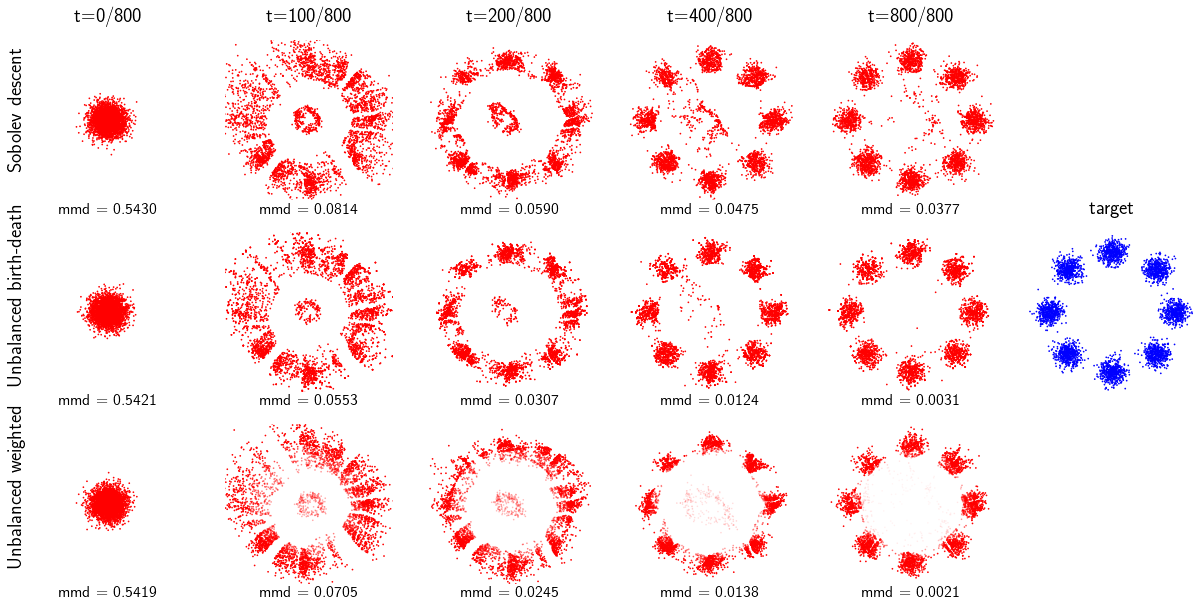

In [22]:
ncols = 5 + 1

fig, axes = plt.subplots(nrows=3, ncols=ncols, figsize=(3.5 * ncols, 10))

load_and_plot(axes[0], 'final_outputs/1a_weighted_noW_gau-mog.pt', name='Sobolev descent',
              show_target=False, show_time=True)
load_and_plot(axes[1], 'final_outputs/1b_unbalanced_gau-mog.pt', name='Unbalanced birth-death',
              show_target=True, show_time=False)
load_and_plot(axes[2], 'final_outputs/1c_weighted_gau-mog.pt', name='Unbalanced weighted',
              show_target=False, show_time=False)

plt.savefig('figs/syn_gauss2mog.png', dpi=160, bbox_inches = 'tight')

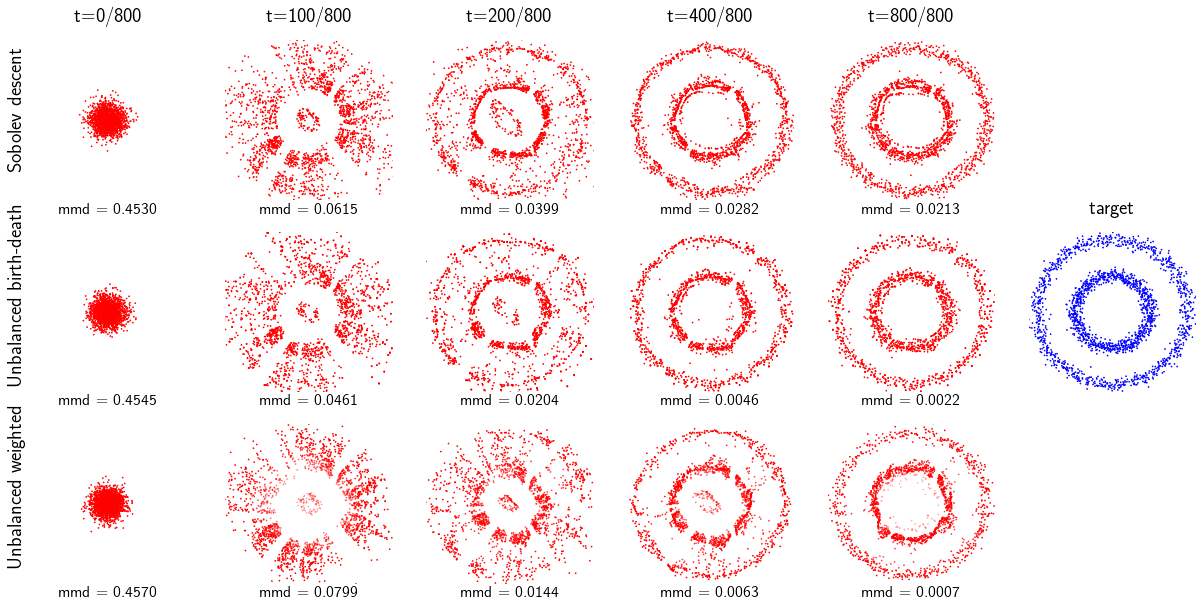

In [23]:
ncols = 5 + 1

fig, axes = plt.subplots(nrows=3, ncols=ncols, figsize=(3.5 * ncols, 10))

load_and_plot(axes[0], 'final_outputs/2a_weighted_noW_gau-cir.pt', name='Sobolev descent',
              show_target=False, show_time=True)
load_and_plot(axes[1], 'final_outputs/2b_unbalanced_gau-cir.pt', name='Unbalanced birth-death',
              show_target=True, show_time=False)
load_and_plot(axes[2], 'final_outputs/2c_weighted_gau-cir.pt', name='Unbalanced weighted',
              show_target=False, show_time=False)

plt.savefig('figs/syn_gauss2circles.png', dpi=160, bbox_inches = 'tight')

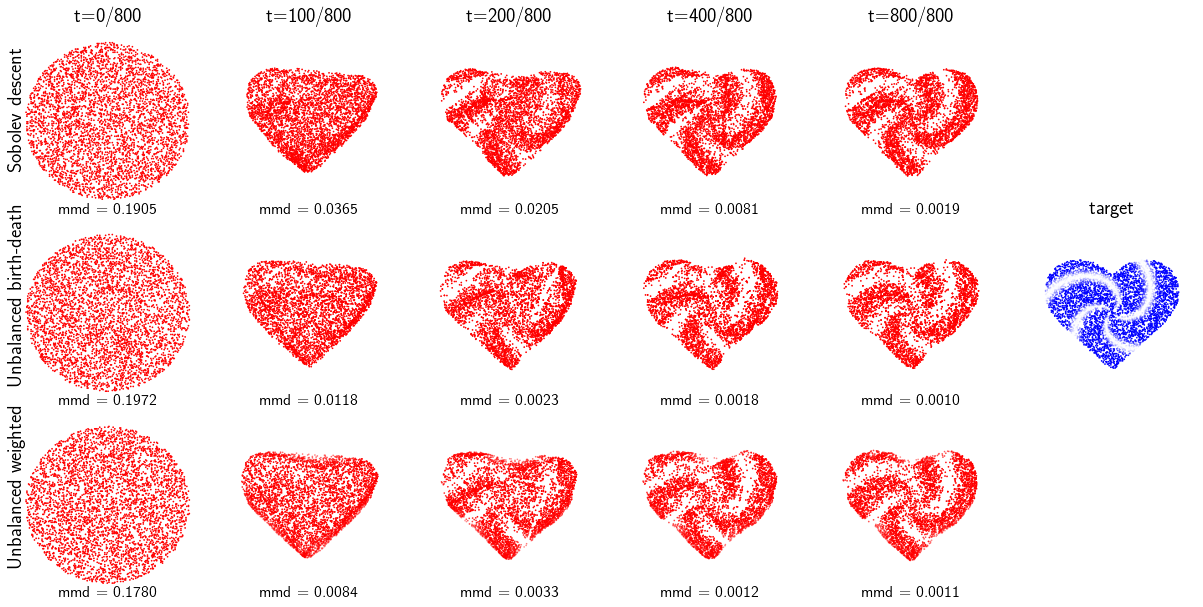

In [24]:
ncols = 5 + 1

fig, axes = plt.subplots(nrows=3, ncols=ncols, figsize=(3.5 * ncols, 10))

load_and_plot(axes[0], 'final_outputs/3a_weighted_noW_dis-hea.pt', name='Sobolev descent',
              show_target=False, show_time=True)
load_and_plot(axes[1], 'final_outputs/3b_unbalanced_dis-hea.pt', name='Unbalanced birth-death',
              show_target=True, show_time=False)
load_and_plot(axes[2], 'final_outputs/3c_weighted_dis-hea.pt', name='Unbalanced weighted',
              show_target=False, show_time=False)

plt.savefig('figs/syn_disk2heart.png', dpi=160, bbox_inches = 'tight')

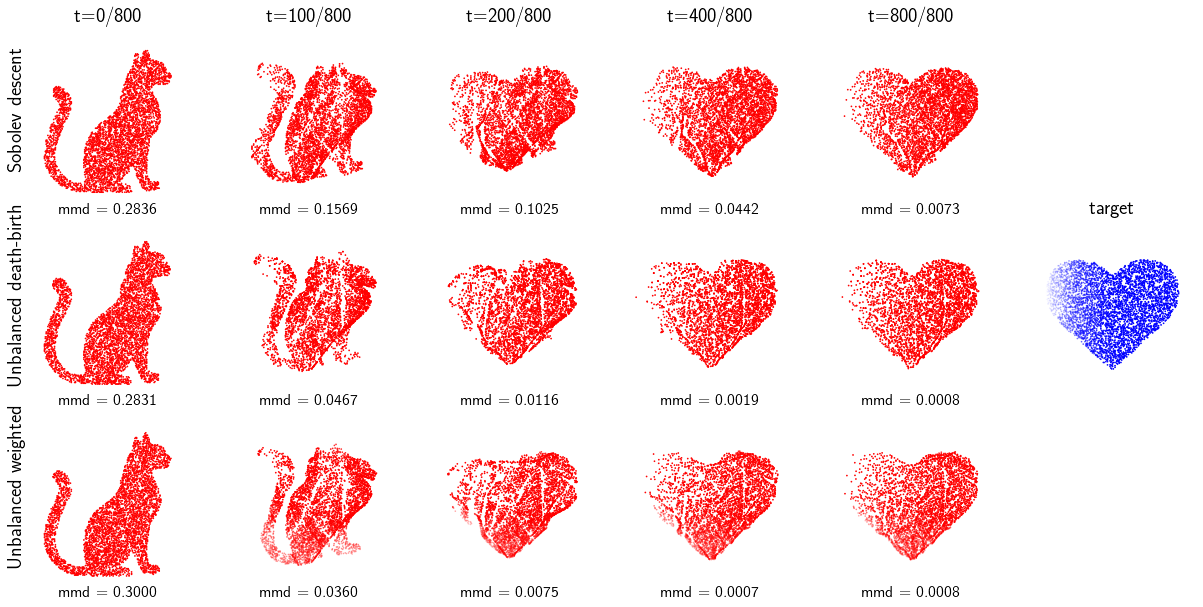

In [25]:
ncols = 5 + 1

fig, axes = plt.subplots(nrows=3, ncols=ncols, figsize=(3.5 * ncols, 10))

load_and_plot(axes[0], 'final_outputs/4a_weighted_noW_cat-hea.pt', name='Sobolev descent',
              show_target=False, show_time=True)
load_and_plot(axes[1], 'final_outputs/4b_unbalanced_cat-hea.pt', name='Unbalanced death-birth',
              show_target=True, show_time=False)
load_and_plot(axes[2], 'final_outputs/4c_weighted_cat-hea.pt', name='Unbalanced weighted',
              show_target=False, show_time=False)

plt.savefig('figs/syn_cat2heart.png', dpi=160, bbox_inches = 'tight')

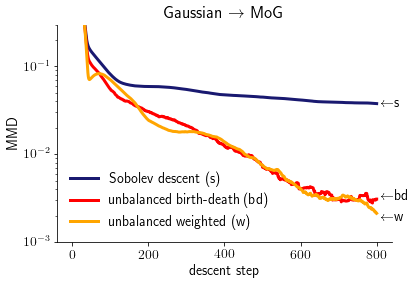

In [50]:
ax = plt.subplot(111)

plot_mmd('final_outputs/1a_weighted_noW_gau-mog.pt', label='Sobolev descent (s)',
        color='midnightblue', short_label=r'$\leftarrow$s')
plot_mmd('final_outputs/1b_unbalanced_gau-mog.pt', label='unbalanced birth-death (bd)',
         dy=0.0002, color='red', short_label=r'$\leftarrow$bd')
plot_mmd('final_outputs/1c_weighted_gau-mog.pt', label='unbalanced weighted (w)',
         dy=-0.0002, color='orange', short_label=r'$\leftarrow$w')

ax.set_ylim([1e-3, 0.3])
ax.set_title(r'Gaussian $\rightarrow$ MoG');

plt.savefig('figs/syn_gauss2mog_mmd.pdf', bbox_inches = 'tight')

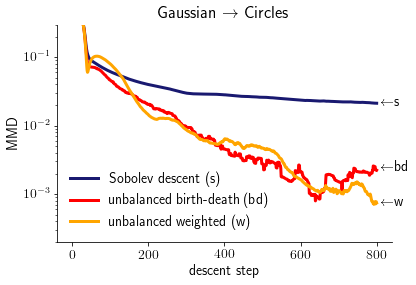

In [51]:
ax = plt.subplot(111)

plot_mmd('final_outputs/2a_weighted_noW_gau-cir.pt', label='Sobolev descent (s)',
        color='midnightblue', short_label=r'$\leftarrow$s')
plot_mmd('final_outputs/2b_unbalanced_gau-cir.pt', label='unbalanced birth-death (bd)',
         dy=0.0001, color='red', short_label=r'$\leftarrow$bd')
plot_mmd('final_outputs/2c_weighted_gau-cir.pt', label='unbalanced weighted (w)',
         dy=-0.00001, color='orange', short_label=r'$\leftarrow$w')

ax.set_ylim([2e-4, 0.3])
ax.set_title(r'Gaussian $\rightarrow$ Circles');

plt.savefig('figs/syn_gauss2circle_mmd.pdf', bbox_inches = 'tight')

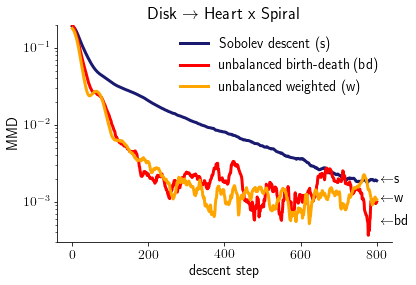

In [52]:
ax = plt.subplot(111)

plot_mmd('final_outputs/3a_weighted_noW_dis-hea.pt', label='Sobolev descent (s)',
        color='midnightblue', short_label=r'$\leftarrow$s')
plot_mmd('final_outputs/3b_unbalanced_dis-hea.pt', label='unbalanced birth-death (bd)',
         dy=-0.0004, color='red', short_label=r'$\leftarrow$bd')
plot_mmd('final_outputs/3c_weighted_dis-hea.pt', label='unbalanced weighted (w)',
         dy=0.00001, color='orange', short_label=r'$\leftarrow$w')

ax.legend(loc='upper right', frameon=False)
ax.set_ylim([3e-4, 0.2])
ax.set_title(r'Disk $\rightarrow$ Heart x Spiral');

plt.savefig('figs/syn_disk2heart_mmd.pdf', bbox_inches = 'tight')

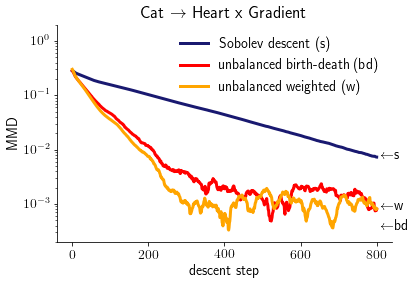

In [53]:
ax = plt.subplot(111)

plot_mmd('final_outputs/4a_weighted_noW_cat-hea.pt', label='Sobolev descent (s)',
        color='midnightblue', short_label=r'$\leftarrow$s')
plot_mmd('final_outputs/4b_unbalanced_cat-hea.pt', label='unbalanced birth-death (bd)',
         dy=-0.0004, color='red', short_label=r'$\leftarrow$bd')
plot_mmd('final_outputs/4c_weighted_cat-hea.pt', label='unbalanced weighted (w)',
         dy=0.00001, color='orange', short_label=r'$\leftarrow$w')

ax.legend(loc='upper right', frameon=False)
ax.set_ylim([2e-4, 2.0])
ax.set_title(r'Cat $\rightarrow$ Heart x Gradient');

plt.savefig('figs/syn_cat2heart_mmd.pdf', bbox_inches = 'tight')